In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import pandas as pd

#Step-by-step process: https://www.analyticsvidhya.com/blog/2021/04/estimation-of-neurons-and-forward-propagation-in-neural-net/
dtype = torch.FloatTensor

# Make 2 data points in NumPy - X - 1x2 matrix, Y - vector (2x1 matrix)
x_data = np.float32([[0,1]])
y_data = np.float32([1,0])

# Construct a linear model - bias vector & weights (1x1 matrixes): number of columns in WW should match number of rows in X to perform matrix multiplication
#https://www.mathsisfun.com/algebra/matrix-multiplying.html
#https://www.nagwa.com/en/explainers/432180315293/
###FOR SIGMOID ACTIVATION FUNCTION
bb = np.float32([-1]) 
WW = np.float32([[4]])

###FOR RELU ACTIVATION FUNCTION
bb_1 = np.float32([9])
WW_1 = np.float32([[4]])

x = Variable(torch.from_numpy(x_data).type(dtype), requires_grad=False) #Declaring tensor to store input values (these values are not changed during learning, hence no gradient history required)
y = Variable(torch.from_numpy(y_data).type(dtype), requires_grad=False) #Declaring tensor to store true output values (not to be changed) used to compute loss function

b_sigm = Variable(torch.from_numpy(bb).type(dtype), requires_grad=True) #Declaring a variable that stores history of gradient calculations for bias tensor (history required to perform backpropagation)
W_sigm = Variable(torch.from_numpy(WW).type(dtype), requires_grad=True) #Declaring a variable that stores history of gradient calculations for weights tensor


###FOR RELU MODEL
b_relu = Variable(torch.from_numpy(bb_1).type(dtype), requires_grad=True)
W_relu = Variable(torch.from_numpy(WW_1).type(dtype), requires_grad=True)

#Articles on gradient descent: 
#https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression).
#https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
#https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/#:~:text=Specifically%2C%20the%20learning%20rate%20is,is%20adapted%20to%20the%20problem.

###INIT DF TO STORE TRAINING RESULTS
path_results = pd.DataFrame(columns = [ 
                                       't',
                                       'W_SIGM',
                                       'b_SIGM',
                                       'Loss_SIGM',
                                       'X0',
                                       'X1',
                                       'NOT_SIGM(X0)',
                                       'NOT_SIGM(X1)',
                                       'W_RELU',
                                       'b_RELU',
                                       'Loss_RELU',
                                       'NOT_RELU(X0)',
                                       'NOT_RELU(X1)'
                                       ]) 

#Learning rate determines how big of an impact each computed gradient has on weights and biases on each iteration (optimum required - too big - wrong convergence; too low - slow learning)
###FOR SIGMOID ACTIVATION FUNCTION
learning_rate_sigm = 50 

###FOR RELU ACTIVATION FUNCTION
learning_rate_relu = 0.2

#Learning iterations (epochs? - https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/) determine the number of time a neuron will attempt to update weights & biases
for t in range(20): 
    ###SIGMOID FUNCTION LEARNING ITERATION
    y_pred_sigm = torch.sigmoid(W_sigm.mm(x) + b_sigm) #Using sigmoid activation function to compute prediction based on weighted output from neuron (history is stored + current value of the weights to be used in updates)
    loss_sigm = (y_pred_sigm - y).pow(2).sum()/2 #Computing loss function as square difference between true and predicted matrix (history is stored)
    
    ###RELU FUNCTION LEARNING ITERATION
    y_pred_relu = torch.relu(W_relu.mm(x) + b_relu)
    loss_relu = (y_pred_relu - y).pow(2).sum()/2

    ###SAVING RESULTS TO USE IN PLOTTING
    path_results = path_results.append(pd.DataFrame.from_dict({'t':t,"W_SIGM":[W_sigm.item()],"b_SIGM":[b_sigm.item()],"Loss_SIGM":[loss_sigm.item()],'X0':[int(x[0,0])],'X1':[int(x[0,1])],'NOT_SIGM(X0)':[y_pred_sigm[0,0].item()],'NOT_SIGM(X1)':[y_pred_sigm[0,1].item()],"W_RELU":[W_relu.item()],"b_RELU":[b_relu.item()],"Loss_RELU":[loss_relu.item()],'NOT_RELU(X0)':[y_pred_relu[0,0].item()],'NOT_RELU(X1)':[y_pred_relu[0,1].item()]}))
    
    ###SIGMOID FUNCTION BACKPROPAGATION & W,b UPDATE
    loss_sigm.backward() 
    W_sigm.data -= learning_rate_sigm * W_sigm.grad.data 
    b_sigm.data -= learning_rate_sigm * b_sigm.grad.data

    ###STEP EXPLANATION
    #1. Compute derivative of the loss function for current iteration to produce gradient value for bias and weight tensors
    #https://www.analyticsvidhya.com/blog/2021/06/how-does-backward-propagation-work-in-neural-networks/
    
    #2. Update weigth tensor - if gradient is positive, weights will decrease, esle - increase; if 0 - local minimum achieved
    #### Gradient value shows change in amount of error vs change in weight & bias value:
    #### negative gradient values mean that increasing the weight will decrease error - weight should be increased
    #### positive gradient values mean that increasing the weight will increase error - weight should be decreased

    # 3. Update bias tensor - if gradient is positive, bias will decrease, esle - increase; if 0 - local minimum achieved

    ###RELU FUNCTION BACKPROPAGATION & W,b UPDATE
    loss_relu.backward()
    W_relu.data -= learning_rate_relu * W_relu.grad.data
    b_relu.data -= learning_rate_relu * b_relu.grad.data

    #4. Zero the gradients after updating W,b (gradient values were computed for W,b values before update - will be replaced in next iteration)
    ###SIGMOID FUNCTION
    W_sigm.grad.data.zero_()
    b_sigm.grad.data.zero_()

    ###RELU FUNCTION
    W_relu.grad.data.zero_()
    b_relu.grad.data.zero_()

###PRINT RESULT TABLE
path_results

,t,W_SIGM,b_SIGM,Loss_SIGM,X0,X1,NOT_SIGM(X0),NOT_SIGM(X1),W_RELU,b_RELU,Loss_RELU,NOT_RELU(X0),NOT_RELU(X1)
0,0,4.000000,-1.000000,0.720922,0,1,0.268941,9.525741e-01,4.000000,9.000000,116.500000,9.000000,13.000000
0,1,1.848294,4.035037,0.497377,0,1,0.982622,9.972223e-01,1.400000,4.800000,26.439999,4.800000,6.200000
0,2,1.710180,3.911759,0.496594,0,1,0.980387,9.963954e-01,0.160000,2.800000,6.000798,2.800000,2.960000
0,3,1.531247,3.751683,0.495224,0,1,0.977060,9.949481e-01,-0.432000,1.848000,1.362079,1.848000,1.416000
0,4,1.281200,3.527344,0.492346,0,1,0.971456,9.919063e-01,-0.715200,1.395200,0.309291,1.395200,0.680000
0,5,0.883039,3.168758,0.483867,0,1,0.959641,9.829062e-01,-0.851200,1.180160,0.070336,1.180160,0.328960
0,6,0.057320,2.421193,0.428942,0,1,0.918429,9.226217e-01,-0.916992,1.078336,0.016084,1.078336,0.161344
0,7,-3.236021,-0.566595,0.203746,0,1,0.362023,2.182535e-02,-0.949261,1.030400,0.003754,1.030400,0.081139
0,8,-3.259318,6.777541,0.471617,0,1,0.998862,9.712018e-01,-0.965489,1.008092,0.000940,1.008092,0.042603
0,9,-4.617487,5.419437,0.238330,0,1,0.995590,6.903914e-01,-0.974009,0.997953,0.000289,0.997953,0.023944


In [ ]:
###COMPUTING LOSS FUNCTION ON SPECIFIED WEIGHT & BIAS DOMAINS - SIGMOID ACTIVATION FUNCTION
w_domain = [i for i in range(-15,6)]
b_domain = [i for i in range(-10,11)]

surface = pd.DataFrame(columns = ['X','Y','Z']) #TO STORE THE CALCULATION RESULTS
for W_num in w_domain: #REPEAT UNTIL ALL W-b COMBINATIONS ARE PARSED
  for b_num in b_domain:
    WW = np.float32([[W_num]]) #CONVERT Weight INTO ARRAY
    W = Variable(torch.from_numpy(WW).type(dtype), requires_grad=True) #CONVERT Weight INTO TENSOR
    bb = np.float32([b_num]) #CONVERT Bias INTO ARRAY
    b = Variable(torch.from_numpy(bb).type(dtype), requires_grad=True) #CONVERT Bias INTO TENSOR
    y_pred = torch.sigmoid(W.mm(x) + b) #COMPUTING NOT FUNCTION USING SIGMOID ACTIVATION F-N
    loss = (y_pred - y).pow(2).sum()/2 #COMPUTING LOSS FUNCTION FOR GIVEN Weight - Bias COMBINATION
    surface = surface.append(pd.DataFrame.from_dict({'X':[W.item()],'Y':[b.item()],'Z':[loss.item()]})) #STORE RESULTS IN DATAFRAME


In [ ]:
###COMPUTING LOSS FUNCTION ON SPECIFIED WEIGHT & BIAS DOMAINS - RELU ACTIVATION FUNCTION
w_domain = [i for i in range(-15,6)]
b_domain = [i for i in range(-10,11)]

surface_relu = pd.DataFrame(columns = ['X','Y','Z']) #TO STORE THE CALCULATION RESULTS
for W_num in w_domain: #REPEAT UNTIL ALL W-b COMBINATIONS ARE PARSED
  for b_num in b_domain:
    WW = np.float32([[W_num]]) #CONVERT Weight INTO ARRAY
    W = Variable(torch.from_numpy(WW).type(dtype), requires_grad=True) #CONVERT Weight INTO TENSOR
    bb = np.float32([b_num]) #CONVERT Bias INTO ARRAY
    b = Variable(torch.from_numpy(bb).type(dtype), requires_grad=True) #CONVERT Bias INTO TENSOR
    y_pred = torch.relu(W.mm(x) + b) #COMPUTING NOT FUNCTION USING RELU ACTIVATION F-N
    loss = (y_pred - y).pow(2).sum()/2 #COMPUTING LOSS FUNCTION FOR GIVEN Weight - Bias COMBINATION
    surface_relu = surface_relu.append(pd.DataFrame.from_dict({'X':[W.item()],'Y':[b.item()],'Z':[loss.item()]})) #STORE RESULTS IN DATAFRAME

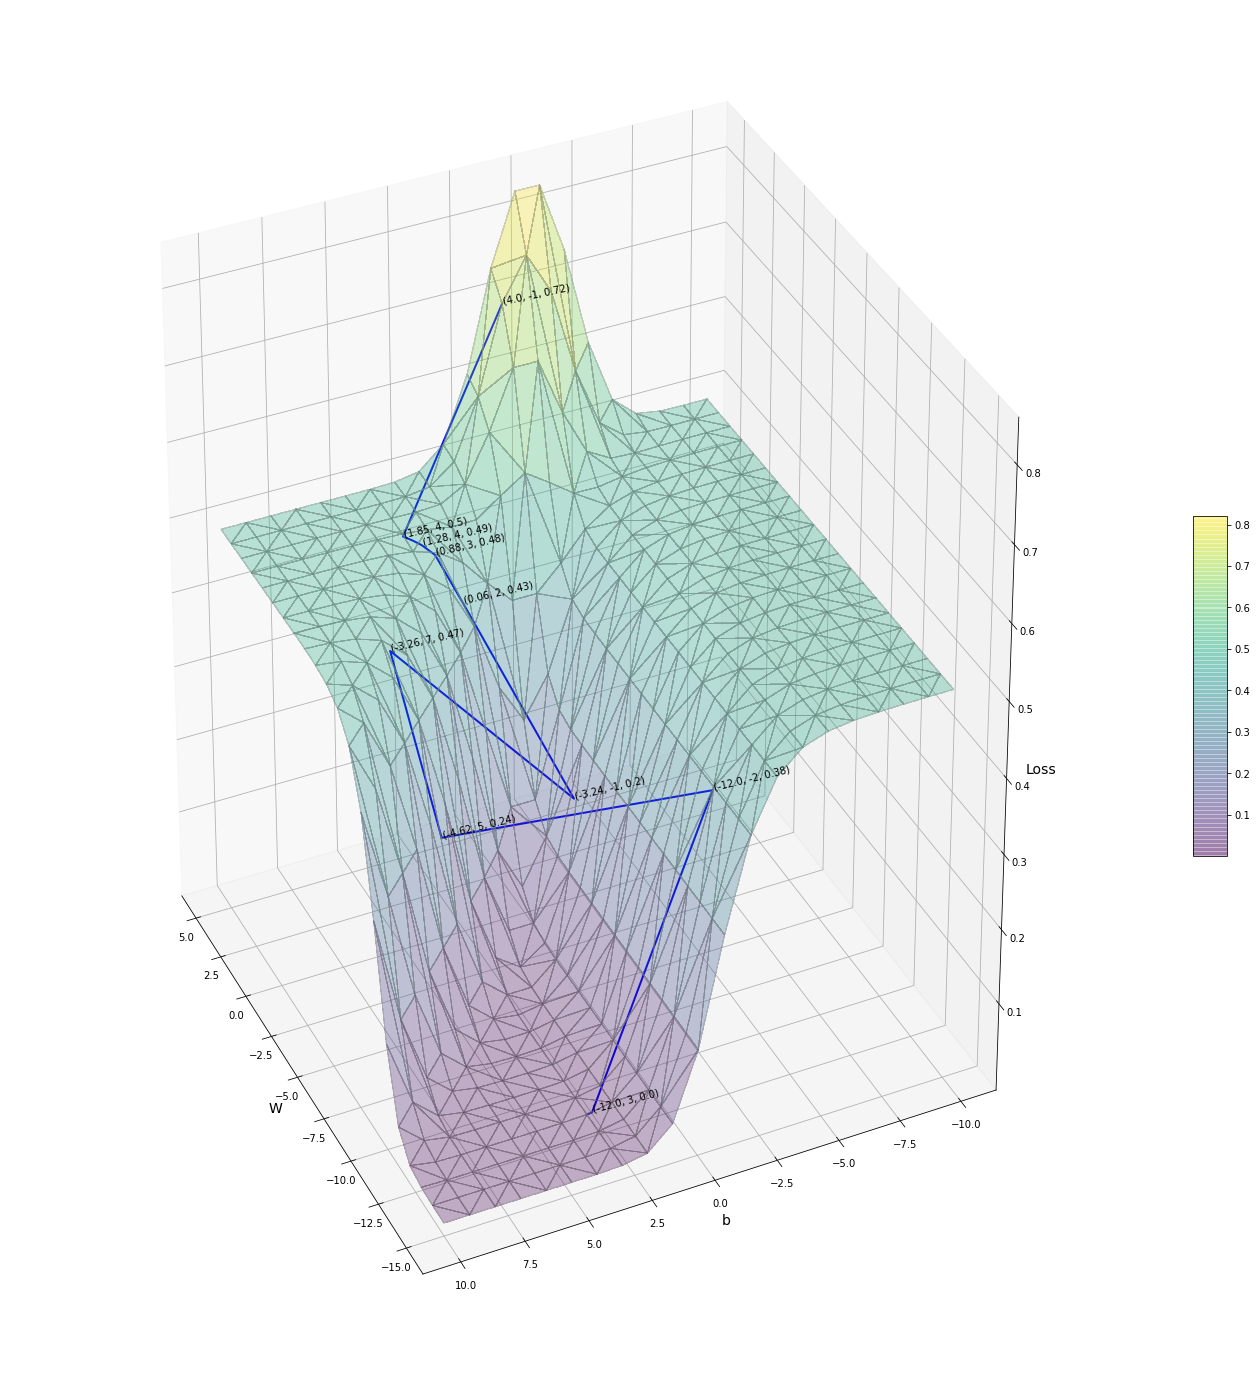

In [ ]:
#PLOTTING 3D SURFACE & PATH - SIGMOID FUNCTION 
####IMPORTS
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = [25, 25] #PLOT SIZE PARAMETERS

###DATA PRE-PROCESSING
X = surface['X']
Y = surface['Y']
Z = surface['Z']
x_path = path_results.head(13)['W_SIGM']
y_path = path_results.head(13)['b_SIGM']
z_path = path_results.head(13)['Loss_SIGM']

###PLOTTING
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(azim=155, elev=30)
surf = ax.plot_trisurf(X, Y, Z, linewidth=0.5, antialiased=False, cmap='viridis', alpha = 0.3, edgecolor='grey')
ax.plot(x_path, y_path, z_path, color = 'Blue', linewidth=2)
ax.set_xlabel('W', size=14)
ax.set_ylabel('b', size=14)
ax.set_zlabel('Loss', size=14)

###ADDING ANNOTATIONS (ADJUST k-k_old TO SHOW MORE LABELS (MAY GET CLUTTERED))
k_old = 0 #TO STORE PREVIOUS LOSS FUNCTION VALUE
for i, j, k in zip(x_path,y_path,z_path):
   if abs(k - k_old) > 0.002: #SHOW LABEL ONLY IF DIFFERENCE IN LOSS FUNCTION IS MORE THAN DEFINED - TO REMOVE EXCESSIVE LABELLING
      ax.text(i, j, k, f'({round(i,2)}, {round(j)}, {round(k,2)})', "y", size=10)
      k_old = k
   else:
      k_old = k
      continue

  
fig.colorbar(surf, shrink=0.25, aspect=10)

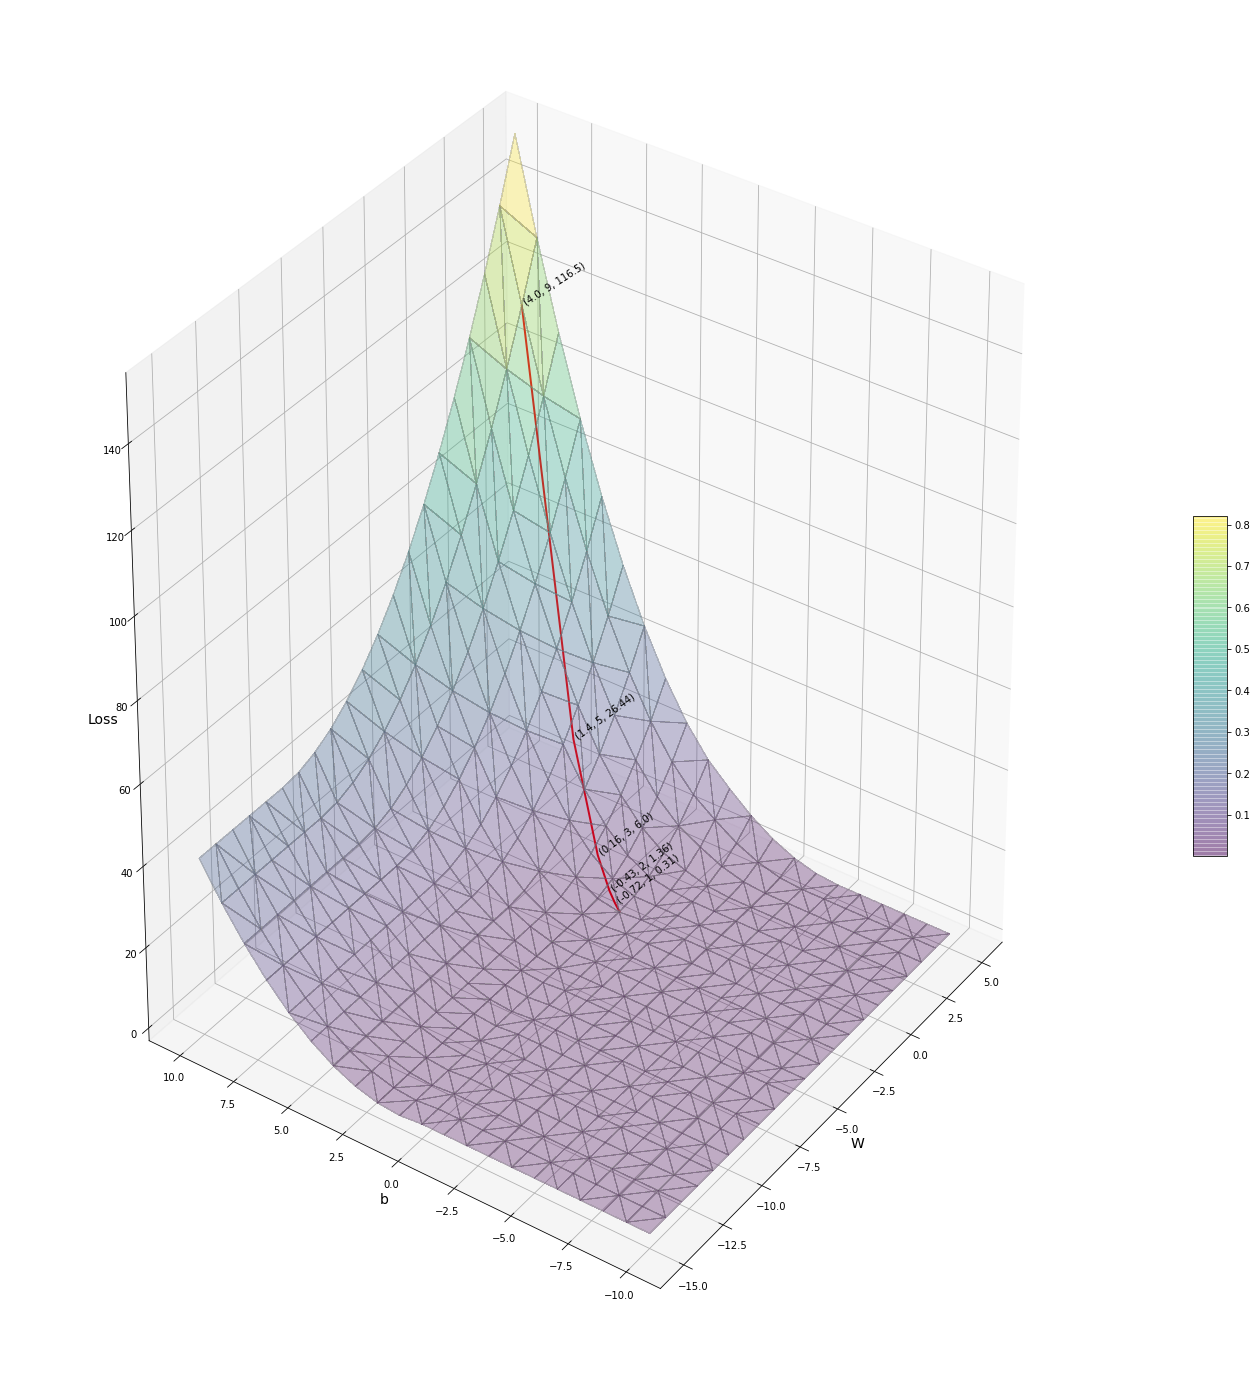

In [ ]:
#PLOTTING 3D SURFACE & PATH - RELU FUNCTION 
###DATA PRE-PROCESSING
X = surface_relu['X']
Y = surface_relu['Y']
Z = surface_relu['Z']
x_path = path_results['W_RELU']
y_path = path_results['b_RELU']
z_path = path_results['Loss_RELU']

###PLOTTING
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(azim=215, elev=30)
ax.plot_trisurf(X, Y, Z, linewidth=0.5, antialiased=False, cmap='viridis', alpha = 0.3, edgecolor='grey')
ax.plot(x_path, y_path, z_path, color = 'Red', linewidth=2)
ax.set_xlabel('W', size=14)
ax.set_ylabel('b', size=14)
ax.set_zlabel('Loss', size=14)

###ADDING ANNOTATIONS (ADJUST k-k_old TO SHOW MORE LABELS (MAY GET CLUTTERED))
k_old = 0
for i, j, k in zip(x_path,y_path,z_path):
   if abs(k - k_old) > 0.25:
      ax.text(i, j, k, f'({round(i,2)}, {round(j)}, {round(k,2)})', "x", size=10)
      k_old = k
   else:
      k_old = k

fig.colorbar(surf, shrink=0.25, aspect=10)